In [ ]:
!pip install Sastrawi -q
!pip install torch -q

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from tqdm.auto import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
# Remove AdamW from transformers import
from transformers import BertTokenizer, BertForSequenceClassification, get_scheduler
from torch.utils.data import DataLoader, Dataset
from google.colab import drive
# Import AdamW from torch.optim
from torch.optim import AdamW

In [ ]:
data = pd.read_csv('/content/dataset_bitha.csv')
data.head()

,full_text,created_at,username
0,intinya ikut pendidikan masuk barak militer in...,Thu Jun 05 09:10:43 +0000 2025,NaN
1,@tempodotco mulai deh dikit-dikit barak. anak ...,Thu Jun 05 09:04:37 +0000 2025,NaN
2,Joon beneran udah kaga sabaran njir mau cepet²...,Thu Jun 05 09:03:05 +0000 2025,NaN
3,Dedi Mulyadi: Siswa Melanggar Jam Malam akan D...,Thu Jun 05 09:00:00 +0000 2025,NaN
4,@NashuhaAlza @b1ru_4 Halahhh aku mah kormasit ...,Thu Jun 05 08:52:19 +0000 2025,NaN


In [ ]:
data['full_text'] = data['full_text'].str.lower()

In [ ]:
import pandas as pd
import re

# Load the CSV file
file_path = '/content/dataset_bitha.csv'
df = pd.read_csv(file_path)

# Load the Excel file containing the normalization dictionary
normalization_file_path = '/content/text.xlsx'
normalization_df = pd.read_excel(normalization_file_path)

# Convert the normalization dataframe to a dictionary
normalization_dict = pd.Series(normalization_df.formal.values, index=normalization_df.slang).to_dict()

# Function to clean and normalize text using the normalization dictionary
def clean_and_normalize_text(text, normalization_dict):
    # Remove emojis and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove excessive whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert text to lowercase for normalization
    text = text.lower()
    # Replace slang or informal words with standard words using the normalization dictionary
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Apply the clean_and_normalize_text function to the 'Comment' column using the normalization dictionary
df['full_text'] = df['full_text'].apply(lambda x: clean_and_normalize_text(x, normalization_dict))

# Save the cleaned and normalized DataFrame to a new CSV file
cleaned_normalized_file_path = 'data_cleaned_normalized.csv'
df.to_csv(cleaned_normalized_file_path, index=False)

print(f"Cleaned and normalized file saved to {cleaned_normalized_file_path}")


Cleaned and normalized file saved to data_cleaned_normalized.csv


In [ ]:
import pandas as pd
from transformers import pipeline

# Load data
data = pd.read_csv("/content/data_cleaned_normalized.csv")

# Load classifier
classifier = pipeline("text-classification", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# Prediksi
results = classifier(data["full_text"].tolist(), truncation=True, max_length=256)

# Pemetaan label
label_map = {
    'negative': 0,
    'neutral': 2,
    'positive': 1
}

# Simpan ke dataframe
data["Label"] = [label_map[result["label"].lower()] for result in results]

# Simpan ke file
data.to_csv("new.csv", index=False)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


<ipython-input-8-1971161314>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentimen', order=['Netral', 'Positif', 'Negatif'], palette='viridis')


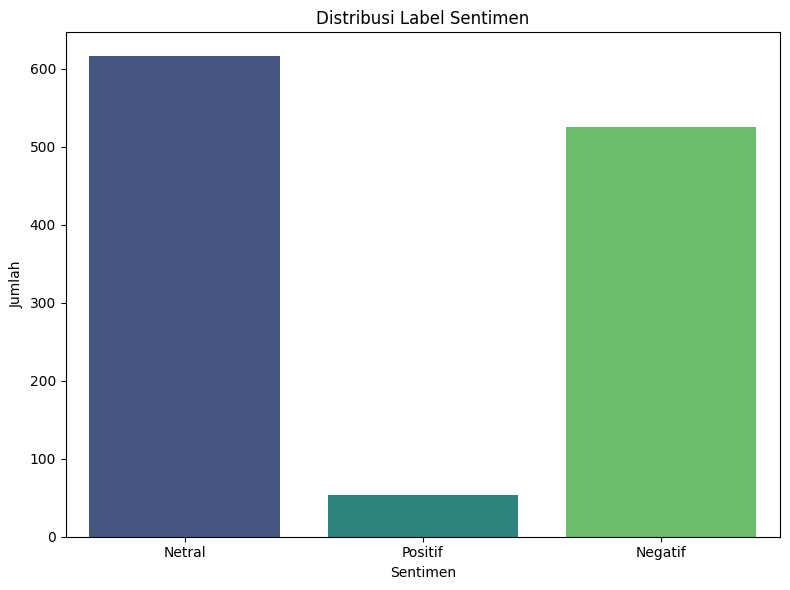

In [ ]:
# Mapping label ke nama sentimen
label_map = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
data['sentimen'] = data['Label'].map(label_map)

# Plot visualisasi jumlah tiap sentimen
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sentimen', order=['Netral', 'Positif', 'Negatif'], palette='viridis')
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

In [ ]:
data.head()

,full_text,created_at,username,Label,sentimen
0,intinya ikut pendidikan masuk barak militer in...,Thu Jun 05 09:10:43 +0000 2025,NaN,0,Negatif
1,tempodotco mulai deh dikitdikit barak anak sek...,Thu Jun 05 09:04:37 +0000 2025,NaN,0,Negatif
2,joon beneran sudah tidak sabaran anjing mau ce...,Thu Jun 05 09:03:05 +0000 2025,NaN,0,Negatif
3,dedi mulyadi siswa melanggar jam malam akan di...,Thu Jun 05 09:00:00 +0000 2025,NaN,2,Netral
4,nashuhaalza b1ru_4 halahhh aku mah kormasit sp...,Thu Jun 05 08:52:19 +0000 2025,NaN,0,Negatif


In [ ]:
stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

data['full_text'] = data['full_text'].apply(lambda x: stopword(x))
data.head()

,full_text,created_at,username,Label,sentimen
0,intinya ikut pendidikan masuk barak militer fo...,Thu Jun 05 09:10:43 +0000 2025,NaN,0,Negatif
1,tempodotco mulai deh dikitdikit barak anak sek...,Thu Jun 05 09:04:37 +0000 2025,NaN,0,Negatif
2,joon beneran tidak sabaran anjing mau cepet² k...,Thu Jun 05 09:03:05 +0000 2025,NaN,0,Negatif
3,dedi mulyadi siswa melanggar jam malam dimasuk...,Thu Jun 05 09:00:00 +0000 2025,NaN,2,Netral
4,nashuhaalza b1ru_4 halahhh aku mah kormasit sp...,Thu Jun 05 08:52:19 +0000 2025,NaN,0,Negatif


In [ ]:
tokenized = data['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[intinya, ikut, pendidikan, masuk, barak, mili..."
1,"[tempodotco, mulai, deh, dikitdikit, barak, an..."
2,"[joon, beneran, tidak, sabaran, anjing, mau, c..."
3,"[dedi, mulyadi, siswa, melanggar, jam, malam, ..."
4,"[nashuhaalza, b1ru_4, halahhh, aku, mah, korma..."
...,...
1189,"[tahu, apa, dia, mau, langsung, berangkat, lan..."
1190,"[masyarakat, capek, melihat, pemimpin, pemimpi..."
1191,"[membebaskan, banjir, kota, bekasi, karawang, ..."
1192,"[usulan, dedi, mulyadi, menangani, kenakalan, ..."


In [ ]:
# Aktifkan integrasi tqdm dengan pandas
tqdm.pandas()

# Inisialisasi stemmer sekali saja
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming
def stemming(text):
    if isinstance(text, list):
        text = " ".join(text)
    return stemmer.stem(text)

# Asumsikan 'tokenized' adalah pandas Series berisi kalimat atau list token
# Gunakan progress_apply untuk progress bar
tokenized = tokenized.progress_apply(stemming)

# Simpan ke CSV
tokenized.to_csv('bersih.csv', index=False)

# Baca ulang jika perlu
data_clean = pd.read_csv('bersih.csv')
data_clean.head()


  0%|          | 0/1194 [00:00<?, ?it/s]

,full_text
0,inti ikut didik masuk barak militer forum buka...
1,tempodotco mulai deh dikitdikit barak anak sek...
2,joon beneran tidak sabar anjing mau cepet kelu...
3,dedi mulyadi siswa langgar jam malam masuk bar...
4,nashuhaalza b1ru 4 halahhh aku mah kormasit sp...


In [ ]:
at1 = pd.read_csv('/content/bersih.csv')
at2 = pd.read_csv('/content/new.csv')
att2 = at2['Label']

result = pd.concat([at1, att2], axis=1)

In [ ]:
result.head()

,full_text,Label
0,inti ikut didik masuk barak militer forum buka...,0
1,tempodotco mulai deh dikitdikit barak anak sek...,0
2,joon beneran tidak sabar anjing mau cepet kelu...,0
3,dedi mulyadi siswa langgar jam malam masuk bar...,2
4,nashuhaalza b1ru 4 halahhh aku mah kormasit sp...,0


In [ ]:
result.to_csv('/content/result.csv', index=False)

In [ ]:
train_s0 = result[result["Label"] == 0]
train_s0["full_text"] = train_s0["full_text"].fillna("tidak ada komentar")

<ipython-input-16-4288738506>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["full_text"] = train_s0["full_text"].fillna("tidak ada komentar")


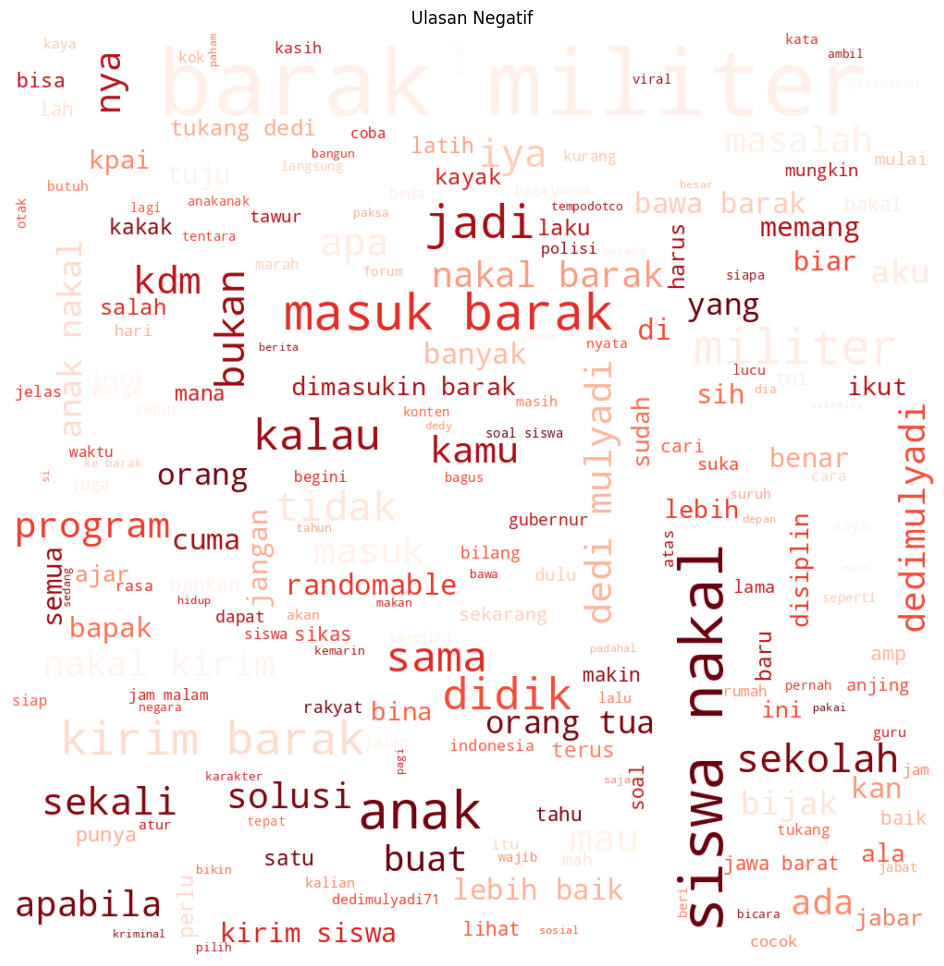

In [ ]:
all_text_s0 = ' '.join(word for word in train_s0["full_text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_s1 = result[result["Label"] == 1]
train_s1["full_text"] = train_s1["full_text"].fillna("Tidak ada komentar")

<ipython-input-18-3823219861>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["full_text"] = train_s1["full_text"].fillna("Tidak ada komentar")


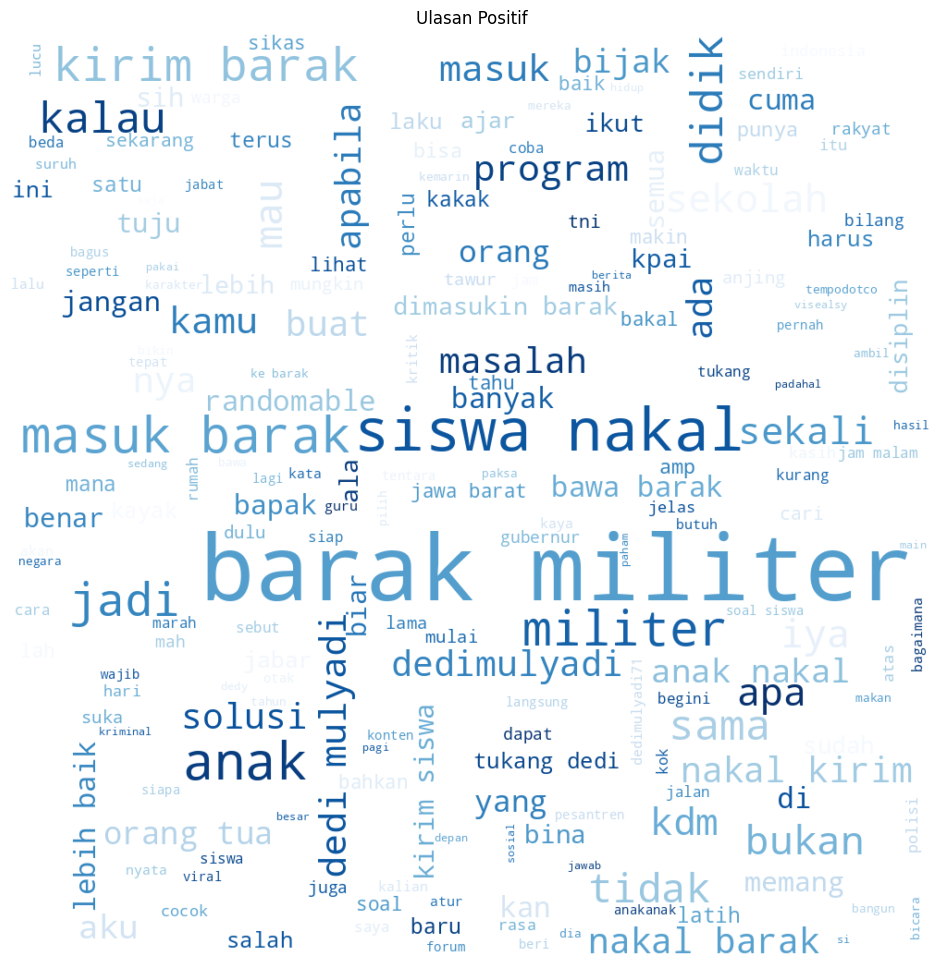

In [ ]:
all_text_s1 = ' '.join(word for word in train_s1["full_text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_s2 = result[result["Label"] == 2]
train_s2["full_text"] = train_s2["full_text"].fillna("Tidak ada komentar")

<ipython-input-20-2147585198>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s2["full_text"] = train_s2["full_text"].fillna("Tidak ada komentar")


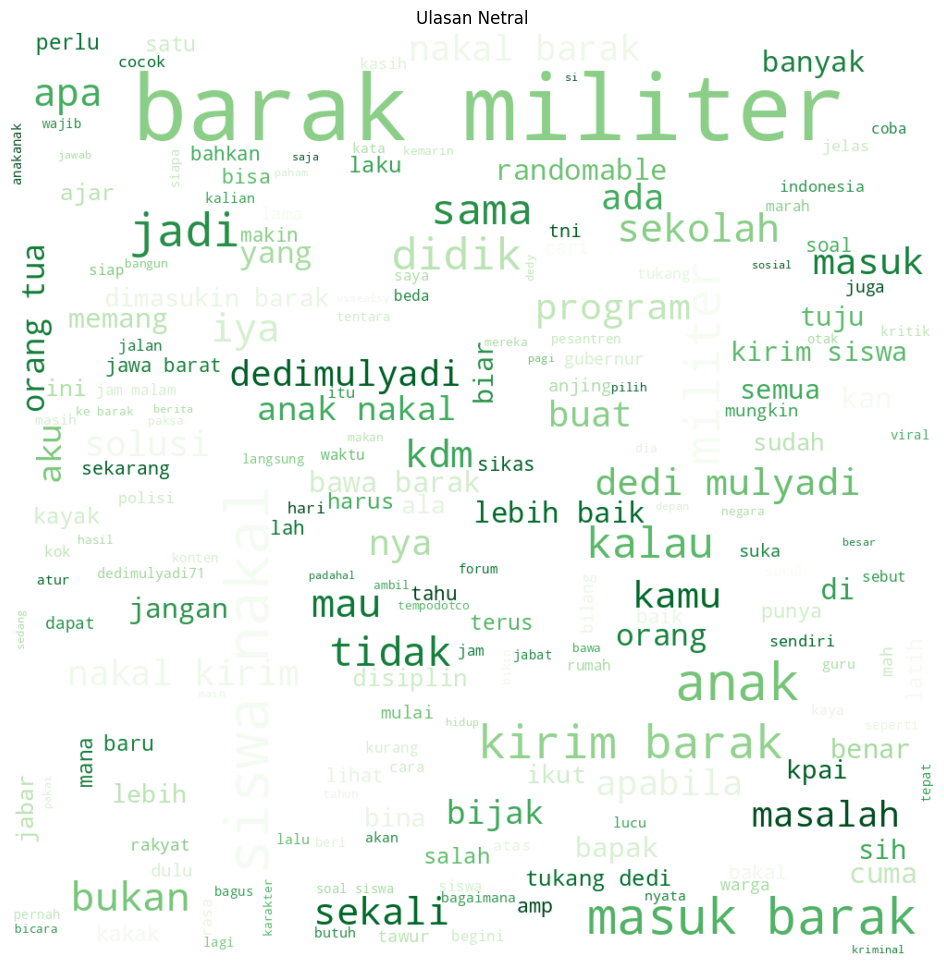

In [ ]:
all_text_s2 = ' '.join(word for word in train_s2["full_text"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Netral")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# Dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe['full_text']
        self.labels = dataframe['Label']
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text.iloc[index])
        text = " ".join(text.split())

        inputs = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            return_token_type_ids=True
        )

        return {
            'input_ids': inputs['input_ids'],
            'attention_mask': inputs['attention_mask'],
            'token_type_ids': inputs['token_type_ids'],
            'labels': int(self.labels.iloc[index])
        }

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# --- CONFIG ---
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")
MAX_LEN = 128
BATCH_SIZE = 32
NUM_EPOCHS = 15

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(result[['full_text']], result['Label'])
train_df = pd.DataFrame({'full_text': X_resampled['full_text'], 'Label': y_resampled})

val_df = pd.read_csv("/content/new_evaluasi.csv")

In [ ]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

# --- DATASET & DATALOADER ---
train_dataset = CustomDataset(train_df, tokenizer, MAX_LEN)
val_dataset = CustomDataset(val_df, tokenizer, MAX_LEN)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,           # tetap shuffle untuk training
    collate_fn=data_collator
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,          # tidak perlu shuffle untuk validasi
    collate_fn=data_collator
)


In [ ]:
# --- MODEL & OPTIMIZER & SCHEDULER ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased", num_labels=3,  hidden_dropout_prob=0.3)

model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)



num_training_steps = NUM_EPOCHS * len(train_dataloader)

lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            # Pastikan semua tensor sudah di device yang benar
            batch = {k: v.to(device) for k, v in batch.items()}

            outputs = model(**batch)
            logits = outputs.logits

            preds = torch.argmax(logits, dim=1)  # langsung argmax tanpa softmax

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch['labels'].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return acc, f1


In [ ]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

best_f1 = 0
best_epoch = 0

train_losses, val_losses, val_accuracies, val_f1s = [], [], [], []

total_steps = NUM_EPOCHS * len(train_dataloader)
progress_bar = tqdm(total=total_steps, desc="Training")

for epoch in range(NUM_EPOCHS):
    model.train()
    total_train_loss = 0

    for batch in train_dataloader:
        batch = {
            k: (torch.tensor(v).to(device) if not isinstance(v, torch.Tensor) else v.to(device))
            for k, v in batch.items()
        }

        outputs = model(**batch)
        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        progress_bar.set_postfix({'epoch': epoch + 1, 'loss': loss.item()})
        progress_bar.update(1)

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Evaluation
    model.eval()
    total_val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in val_dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            total_val_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch['labels'].cpu().numpy())

    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    val_acc = (torch.tensor(all_preds) == torch.tensor(all_labels)).float().mean().item()
    val_f1 = f1_score(all_labels, all_preds, average='weighted')

    val_accuracies.append(val_acc)
    val_f1s.append(val_f1)

    print(f"\nEpoch {epoch+1}/{NUM_EPOCHS} — "
          f"Train Loss: {avg_train_loss:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | "
          f"Val Accuracy: {val_acc:.4f} | F1 Score: {val_f1:.4f}")

    if val_f1 > best_f1:
        best_f1 = val_f1
        best_epoch = epoch
        torch.save(model.state_dict(), "best_model.pt")

progress_bar.close()
print(f"\nTraining selesai. Best F1: {best_f1:.4f} pada epoch {best_epoch+1}")


Training:   7%|▋         | 58/870 [00:29<06:19,  2.14it/s, epoch=1, loss=0.919]


Epoch 1/15 — Train Loss: 1.0567 | Val Loss: 1.0192 | Val Accuracy: 0.4933 | F1 Score: 0.4943


Training:  13%|█▎        | 116/870 [01:10<05:49,  2.15it/s, epoch=2, loss=0.924]


Epoch 2/15 — Train Loss: 0.9344 | Val Loss: 0.8181 | Val Accuracy: 0.5800 | F1 Score: 0.5810


Training:  20%|██        | 174/870 [02:19<05:48,  2.00it/s, epoch=3, loss=0.554]


Epoch 3/15 — Train Loss: 0.7566 | Val Loss: 0.6489 | Val Accuracy: 0.7067 | F1 Score: 0.7086


Training:  27%|██▋       | 232/870 [02:58<05:15,  2.02it/s, epoch=4, loss=0.604]


Epoch 4/15 — Train Loss: 0.6223 | Val Loss: 0.5694 | Val Accuracy: 0.7000 | F1 Score: 0.7000


Training:  33%|███▎      | 290/870 [03:30<04:39,  2.07it/s, epoch=5, loss=0.268]


Epoch 5/15 — Train Loss: 0.4916 | Val Loss: 0.5032 | Val Accuracy: 0.7733 | F1 Score: 0.7638


Training:  40%|████      | 348/870 [04:08<04:42,  1.85it/s, epoch=6, loss=0.423]


Epoch 6/15 — Train Loss: 0.3937 | Val Loss: 0.4307 | Val Accuracy: 0.8133 | F1 Score: 0.8077


Training:  47%|████▋     | 406/870 [04:53<03:52,  2.00it/s, epoch=7, loss=0.275]


Epoch 7/15 — Train Loss: 0.3613 | Val Loss: 0.3909 | Val Accuracy: 0.8400 | F1 Score: 0.8375


Training:  53%|█████▎    | 464/870 [05:31<03:13,  2.10it/s, epoch=8, loss=0.3]


Epoch 8/15 — Train Loss: 0.3001 | Val Loss: 0.3345 | Val Accuracy: 0.8400 | F1 Score: 0.8367


Training:  60%|██████    | 522/870 [06:03<02:52,  2.02it/s, epoch=9, loss=0.191]


Epoch 9/15 — Train Loss: 0.2801 | Val Loss: 0.2577 | Val Accuracy: 0.8933 | F1 Score: 0.8935


Training:  67%|██████▋   | 580/870 [06:47<02:29,  1.94it/s, epoch=10, loss=0.162]


Epoch 10/15 — Train Loss: 0.2670 | Val Loss: 0.2719 | Val Accuracy: 0.8800 | F1 Score: 0.8788


Training:  73%|███████▎  | 638/870 [07:20<01:55,  2.01it/s, epoch=11, loss=0.171]


Epoch 11/15 — Train Loss: 0.2271 | Val Loss: 0.2484 | Val Accuracy: 0.9267 | F1 Score: 0.9264


Training:  80%|████████  | 696/870 [08:00<01:43,  1.68it/s, epoch=12, loss=0.258]


Epoch 12/15 — Train Loss: 0.2104 | Val Loss: 0.1923 | Val Accuracy: 0.9333 | F1 Score: 0.9328


Training:  87%|████████▋ | 754/870 [08:41<00:59,  1.96it/s, epoch=13, loss=0.0815]


Epoch 13/15 — Train Loss: 0.2017 | Val Loss: 0.1826 | Val Accuracy: 0.9400 | F1 Score: 0.9398


Training:  93%|█████████▎| 812/870 [09:32<00:29,  1.99it/s, epoch=14, loss=0.189]


Epoch 14/15 — Train Loss: 0.1867 | Val Loss: 0.2264 | Val Accuracy: 0.9267 | F1 Score: 0.9260


Training: 100%|██████████| 870/870 [10:06<00:00,  1.44it/s, epoch=15, loss=0.233]


Epoch 15/15 — Train Loss: 0.1799 | Val Loss: 0.1928 | Val Accuracy: 0.9400 | F1 Score: 0.9395

Training selesai. Best F1: 0.9398 pada epoch 13


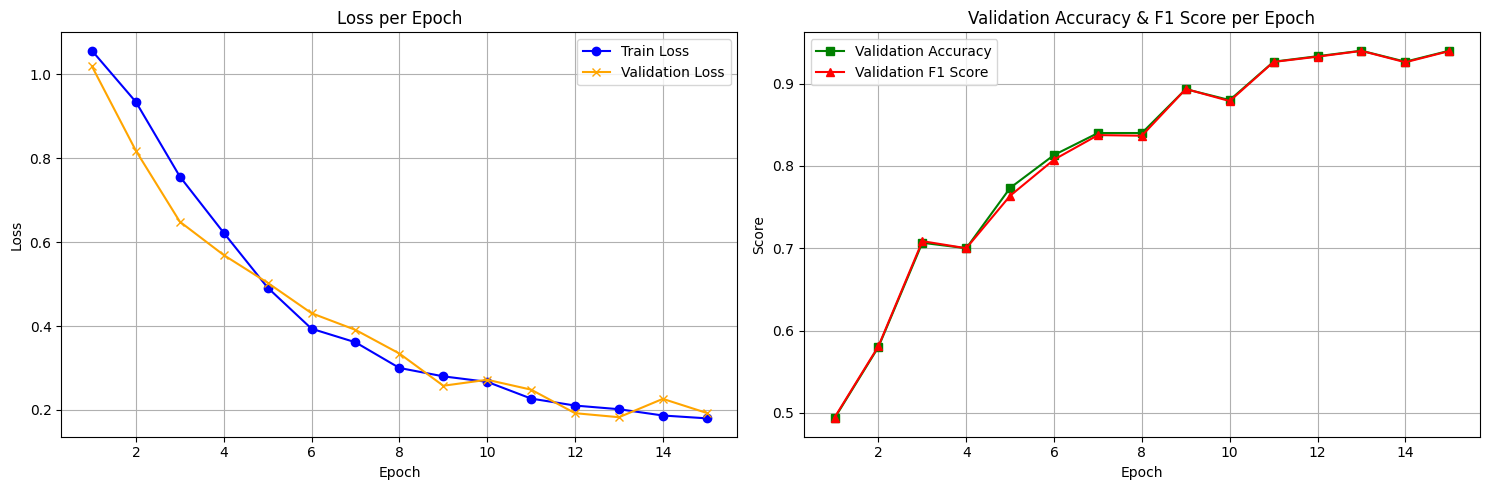

In [ ]:
# Visualisasi hasil training
epochs = range(1, NUM_EPOCHS + 1)

plt.figure(figsize=(15, 5))

# Grafik Train Loss dan Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', color='blue', label='Train Loss')
plt.plot(epochs, val_losses, marker='x', color='orange', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Grafik Validation Accuracy & F1 Score
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, marker='s', color='green', label='Validation Accuracy')
plt.plot(epochs, val_f1s, marker='^', color='red', label='Validation F1 Score')
plt.title('Validation Accuracy & F1 Score per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Validation Accuracy: 0.9400
Validation F1 Score (weighted): 0.9398

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        50
           1       0.98      1.00      0.99        50
           2       0.94      0.90      0.92        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



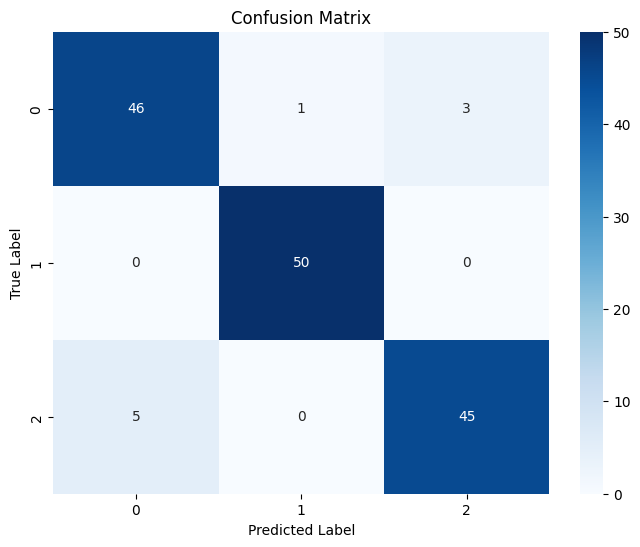

In [ ]:
import torch
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Muat model terbaik
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

all_preds, all_labels = [], []

with torch.no_grad():
    for batch in val_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# Hitung metrik
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation F1 Score (weighted): {f1:.4f}")

# Laporan klasifikasi per kelas
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Confusion matrix visualisasi
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pickle

# Simpan keseluruhan model (bukan hanya state_dict) ke file .pkl
with open("best_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
import torch
import pickle

MODEL_PATH = "/content/best_model.pkl"

# Load model di GPU dulu
with open(MODEL_PATH, "rb") as f:
    model = pickle.load(f)

# Pindahkan model ke CPU
model.to(torch.device("cpu"))

# Simpan ulang model dalam format CPU
with open("/content/saved_bitha_new.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model berhasil disimpan ulang untuk CPU!")


✅ Model berhasil disimpan ulang untuk CPU!


In [ ]:
import shutil

# Mount Google Drive (kalau belum)
from google.colab import drive
drive.mount('/content/drive')

# Salin file ke Drive
shutil.copy("/content/saved_bitha_new.pkl", "/content/drive/MyDrive/saved_bitha_new_1.pkl")

print("✅ Model berhasil disalin ke Google Drive")


Mounted at /content/drive
✅ Model berhasil disalin ke Google Drive
